In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [3]:
stone = pd.read_csv('data/gold_label/stone_3k.csv')
sample = pd.read_csv('data/ner_headlines/sampled_headlines_ner.csv')

In [6]:
stone.shape

(2880, 16)

In [4]:
stone_date = pd.merge(stone, sample[['document_id', 'date_published']], how='inner', on='document_id')
stone_date.head()

,document_id,text,ner_tag_text,ner,ner_type,ner_begin,ner_end,target_order,Sentiment - NEG,Sentiment - NEUTR,Sentiment - POZ,aggregated_sentiment,Ton - NEG,Ton - NEUTR,Ton - POZ,aggregated_tone,date_published
0,65,"Bandić favorit, a u drugi krug bi mogao ići i ...","<strong>Bandić</strong> favorit, a u drugi kru...",Bandić,PER,0,6,0,0.00,0.17,0.83,Sentiment - POZ,0.00,0.50,0.50,Ton - NEUTR,2013-03-28
1,126,"Emir se šokira kad sazna za Ferihinu laž, Gund...",<strong>Emir</strong> se šokira kad sazna za F...,Emir,PER,0,4,0,0.00,0.67,0.33,Sentiment - NEUTR,1.00,0.00,0.00,Ton - NEG,2013-07-24
2,180,Boo dobio konkurenciju! Da li je ovo najslađi ...,<strong>Boo</strong> dobio konkurenciju! Da li...,Boo,PER,0,3,0,0.00,0.17,0.83,Sentiment - POZ,0.00,0.00,1.00,Ton - POZ,2013-11-21
3,187,Ronaldo: Kladio bih se da će Leo Messi osvojit...,Ronaldo: Kladio bih se da će <strong>Leo Messi...,Leo Messi,PER,29,38,0,0.00,0.00,1.00,Sentiment - POZ,0.00,0.33,0.67,Ton - POZ,2013-12-13
4,308,"Brill: Mobiteli su stalno uz nas, tako bi i va...",<strong>Brill</strong>: Mobiteli su stalno uz ...,Brill,PER,0,5,0,0.17,0.83,0.00,Sentiment - NEUTR,0.17,0.83,0.00,Ton - NEUTR,2014-11-21


In [5]:
stone_date.to_csv('data/gold_label/stone_3k_date.csv', index=False)

In [11]:
# Plot drift for top words
period_labels = {
    0: [2000, 2004],
    1: [2005, 2009],
    2: [2010, 2014],
    3: [2015, 2019],
    4: [2020, 2024],
}

In [12]:
def get_period_label(year):
    for label, (start, end) in period_labels.items():
        if start <= year <= end:
            return label
    return None

stone_date['period_label'] = pd.to_datetime(stone_date['date_published']).dt.year.apply(get_period_label)
stone_date.head()

,document_id,text,ner_tag_text,ner,ner_type,ner_begin,ner_end,target_order,Sentiment - NEG,Sentiment - NEUTR,Sentiment - POZ,aggregated_sentiment,Ton - NEG,Ton - NEUTR,Ton - POZ,aggregated_tone,date_published,period_label
0,65,"Bandić favorit, a u drugi krug bi mogao ići i ...","<strong>Bandić</strong> favorit, a u drugi kru...",Bandić,PER,0,6,0,0.00,0.17,0.83,Sentiment - POZ,0.00,0.50,0.50,Ton - NEUTR,2013-03-28,2
1,126,"Emir se šokira kad sazna za Ferihinu laž, Gund...",<strong>Emir</strong> se šokira kad sazna za F...,Emir,PER,0,4,0,0.00,0.67,0.33,Sentiment - NEUTR,1.00,0.00,0.00,Ton - NEG,2013-07-24,2
2,180,Boo dobio konkurenciju! Da li je ovo najslađi ...,<strong>Boo</strong> dobio konkurenciju! Da li...,Boo,PER,0,3,0,0.00,0.17,0.83,Sentiment - POZ,0.00,0.00,1.00,Ton - POZ,2013-11-21,2
3,187,Ronaldo: Kladio bih se da će Leo Messi osvojit...,Ronaldo: Kladio bih se da će <strong>Leo Messi...,Leo Messi,PER,29,38,0,0.00,0.00,1.00,Sentiment - POZ,0.00,0.33,0.67,Ton - POZ,2013-12-13,2
4,308,"Brill: Mobiteli su stalno uz nas, tako bi i va...",<strong>Brill</strong>: Mobiteli su stalno uz ...,Brill,PER,0,5,0,0.17,0.83,0.00,Sentiment - NEUTR,0.17,0.83,0.00,Ton - NEUTR,2014-11-21,2


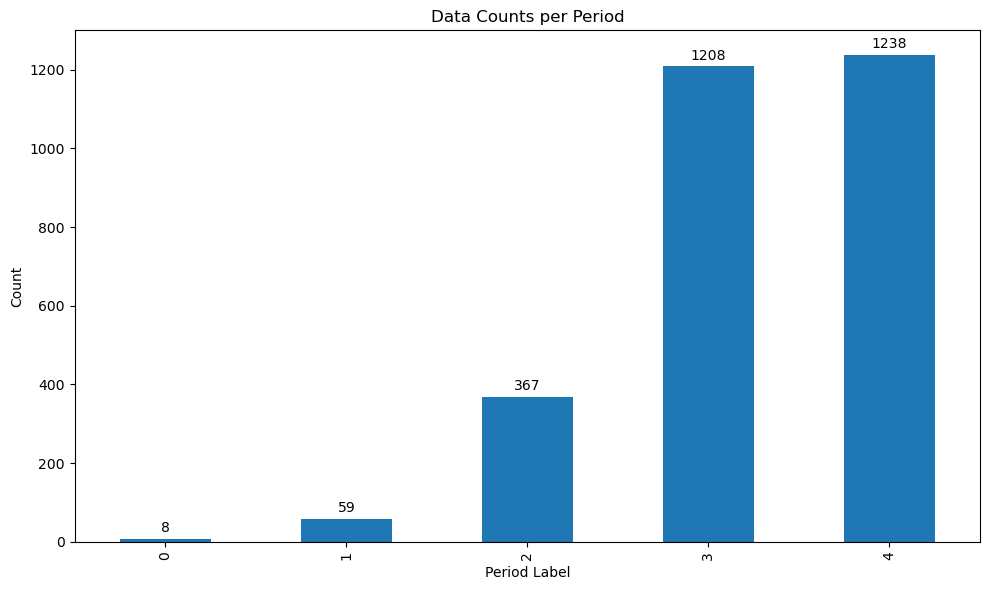

In [19]:
# Count the number of entries per period
period_counts = stone_date['period_label'].value_counts().sort_index()

# Plot the data
ax = period_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Data Counts per Period')
plt.xlabel('Period Label')
plt.ylabel('Count')

# Add counts to the bars
for i, count in enumerate(period_counts):
    ax.text(i, count + 10, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

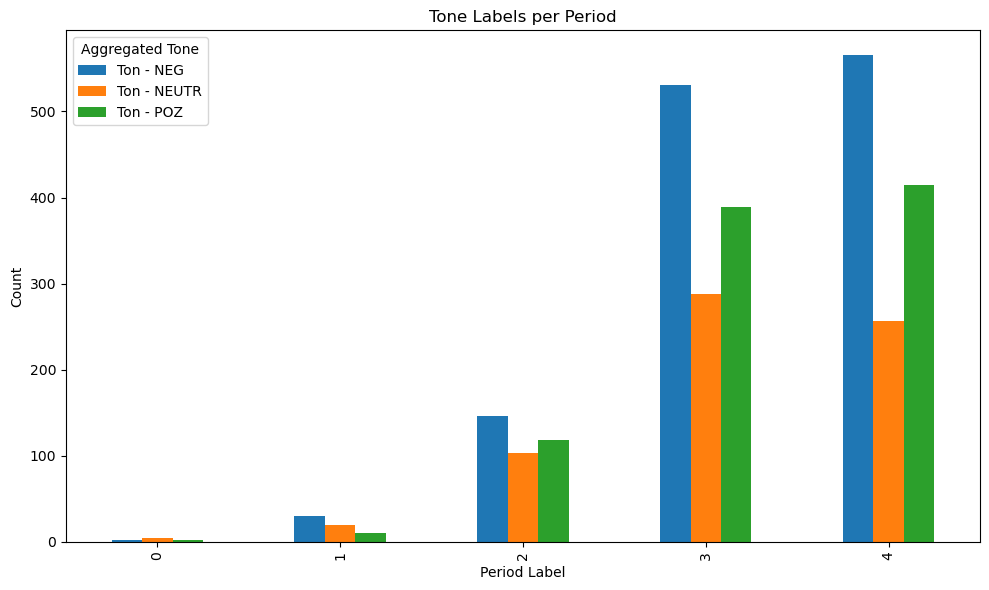

In [15]:
import matplotlib.pyplot as plt

# Count the occurrences of aggregated_tone per period_label
tone_counts = stone_date.groupby(['period_label', 'aggregated_tone']).size().unstack()

# Plot the data
tone_counts.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Tone Labels per Period')
plt.xlabel('Period Label')
plt.ylabel('Count')
plt.legend(title='Aggregated Tone')
plt.tight_layout()
plt.show()

In [ ]:
# Adjust font sizes for the plot
ax.set_title('Percentage of Tone Labels per Period', fontsize=10)
ax.set_xlabel('Period Label', fontsize=8)
ax.set_ylabel('Percentage', fontsize=8)
ax.legend(title='Aggregated Tone', fontsize=8, title_fontsize=9)

# Adjust the figure size
ax.figure.set_size_inches(8, 4)

# Redraw the plot with the updated font sizes and figure size
plt.tight_layout()
plt.show()

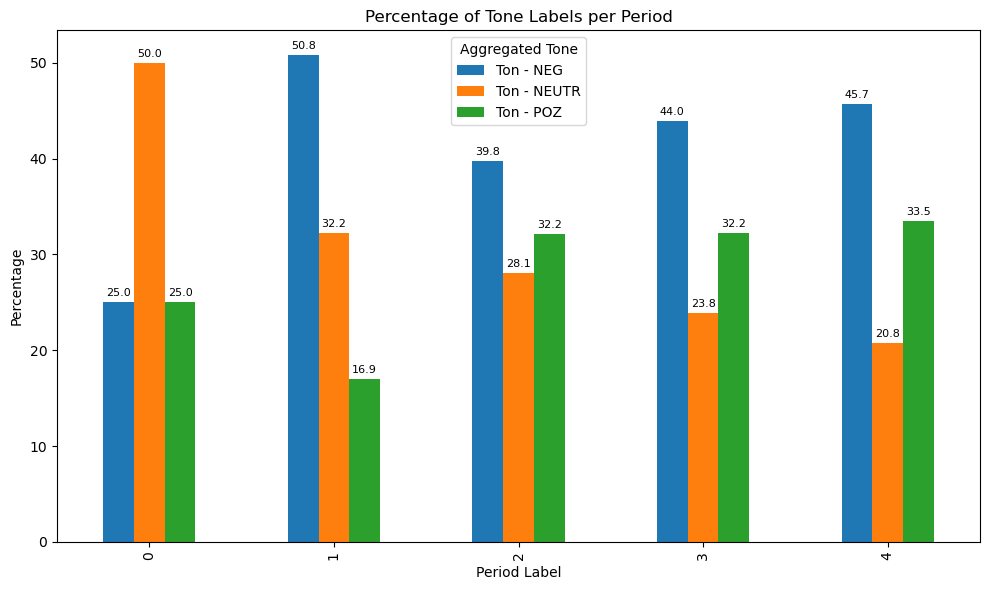

In [31]:
# Calculate the percentage of each tone label per period
tone_percentage = tone_counts.div(tone_counts.sum(axis=1), axis=0) * 100

# Plot the data
ax = tone_percentage.plot(kind='bar', figsize=(10, 6))
plt.title('Percentage of Tone Labels per Period')
plt.xlabel('Period Label')
plt.ylabel('Percentage')
plt.legend(title='Aggregated Tone')

# Add percentages to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=8, padding=3)

plt.tight_layout()
plt.show()

In [24]:
from math import sqrt

# Function to calculate confidence intervals
def calculate_confidence_intervals(counts, total):
    p = counts / total  # Probability (mean)
    q = 1 - p  # Complement of probability
    sd = sqrt(p * q)  # Standard deviation
    ci_lower = p - 1.96 * sd / sqrt(total)  # Lower bound of CI
    ci_upper = p + 1.96 * sd / sqrt(total)  # Upper bound of CI
    return ci_lower, ci_upper

# Calculate confidence intervals for each label per period
confidence_intervals = tone_counts.div(tone_counts.sum(axis=1), axis=0).apply(
    lambda row: row.apply(lambda p: calculate_confidence_intervals(p * row.sum(), row.sum())), axis=1
)

# Convert confidence intervals to a readable format
ci_df = confidence_intervals.applymap(lambda ci: {'lower': ci[0], 'upper': ci[1]})
ci_df

/tmp/ipykernel_206207/440671851.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ci_df = confidence_intervals.applymap(lambda ci: {'lower': ci[0], 'upper': ci[1]})


aggregated_tone,Ton - NEG,Ton - NEUTR,Ton - POZ
period_label,,,
0,"{'lower': -0.5987048957087499, 'upper': 1.0987...","{'lower': -0.48, 'upper': 1.48}","{'lower': -0.5987048957087499, 'upper': 1.0987..."
1,"{'lower': -0.47138464946966596, 'upper': 1.488...","{'lower': -0.5937876459015876, 'upper': 1.2378...","{'lower': -0.5658720253815283, 'upper': 0.9048..."
2,"{'lower': -0.5614977889812406, 'upper': 1.3571...","{'lower': -0.6000107372480572, 'upper': 1.1613...","{'lower': -0.5939157994253764, 'upper': 1.2369..."
3,"{'lower': -0.5332465242427591, 'upper': 1.4123...","{'lower': -0.5967678825590731, 'upper': 1.0735...","{'lower': -0.5937912020139726, 'upper': 1.2378..."
4,"{'lower': -0.5192121276776154, 'upper': 1.4335...","{'lower': -0.5873510281791638, 'upper': 1.0025...","{'lower': -0.5900325430278128, 'upper': 1.2604..."


In [33]:
for period, row in confidence_intervals.iterrows():
    print(f"Period {period}:")
    for label, ci in row.items():
        print(f"  {label}: CI = {np.round(ci,2)}")
    print()

Period 0:
  Ton - NEG: CI = [-0.6  1.1]
  Ton - NEUTR: CI = [-0.48  1.48]
  Ton - POZ: CI = [-0.6  1.1]

Period 1:
  Ton - NEG: CI = [-0.47  1.49]
  Ton - NEUTR: CI = [-0.59  1.24]
  Ton - POZ: CI = [-0.57  0.9 ]

Period 2:
  Ton - NEG: CI = [-0.56  1.36]
  Ton - NEUTR: CI = [-0.6   1.16]
  Ton - POZ: CI = [-0.59  1.24]

Period 3:
  Ton - NEG: CI = [-0.53  1.41]
  Ton - NEUTR: CI = [-0.6   1.07]
  Ton - POZ: CI = [-0.59  1.24]

Period 4:
  Ton - NEG: CI = [-0.52  1.43]
  Ton - NEUTR: CI = [-0.59  1.  ]
  Ton - POZ: CI = [-0.59  1.26]

